## Ceneo Analyzer


## Biblioteki

In [39]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów wszystkich produktów, o których zostały pobrane opinie

In [40]:
print(*[filename.split('.')[0] for filename in os.listdir("opinions")], sep="\n")

56920809
86063736


## Kod produktu, dla którego ma zostać wykonana analiza opinii

In [41]:
product_id = input("Podaj kod produktu w serwisie Ceneo.pl: ") 

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [42]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [43]:
#opinions

## Przekształcanie danych

In [44]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split("/")[0].replace(",",".")).astype(float)

## Podstawowe statystyki

In [45]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

## Histogram częstości poszczególnych ocen w opiniach o produkcie

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '232')]

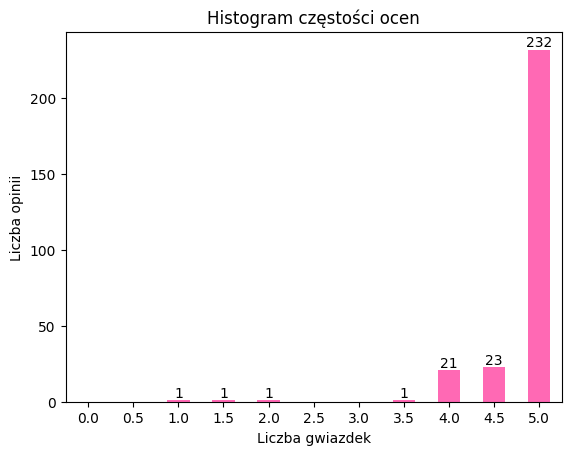

In [64]:
rating_distribution = opinions.rating.value_counts().sort_index().reindex(np.arange(0,5.5,0.5), fill_value=0.0)
fig,ax=plt.subplots()
rating_distribution.plot.bar(color="hotpink")
plt.xticks(rotation = 0)
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.title("Histogram częstości ocen")
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x:int(x) if x>0 else'')

## Udział poszczególnych rekomendacji w opiniach o prudukcie

Text(0.5, 1.0, 'Rekomendacje w opiniach')

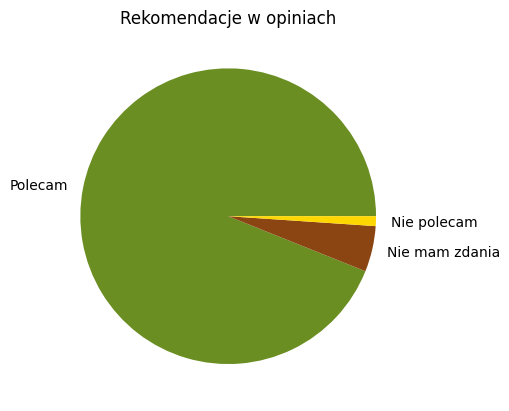

In [94]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam",None,"Nie polecam"])
recommendation_distribution
recommendation_distribution.plot.pie(
    label='',
    colors=["olivedrab","saddlebrown","gold"],
    labels = ["Polecam","Nie mam zdania","Nie polecam"]
)
plt.title("Rekomendacje w opiniach")